import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import f1_score, classification_report, confusion_matrix
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('D:\\2024-2023_HK2\\AIOT\\FinalProject\\Human_vital_signs_R.csv')

In [3]:
df.sample(10)

,HR (BPM),RESP (BPM),SpO2 (%),TEMP (*C),OUTPUT
6020,86,18.0,100.0,32.0,Normal
2511,96,21.0,96.0,31.0,Normal
4118,82,19.0,98.0,25.0,Normal
5060,91,19.0,99.0,33.0,Normal
2636,84,15.0,96.0,32.0,Normal
5310,89,15.0,100.0,29.0,Normal
5259,92,16.0,100.0,29.0,Normal
6313,82,12.0,100.0,33.0,Normal
2335,76,17.0,96.0,29.0,Normal
5793,98,10.0,100.0,31.0,Normal


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6393 entries, 0 to 6392
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   HR (BPM)    6393 non-null   int64  
 1   RESP (BPM)  6373 non-null   float64
 2   SpO2 (%)    6392 non-null   float64
 3   TEMP (*C)   6393 non-null   float64
 4   OUTPUT      6393 non-null   object 
dtypes: float64(3), int64(1), object(1)
memory usage: 249.9+ KB


In [5]:
df.isnull().sum()

HR (BPM)       0
RESP (BPM)    20
SpO2 (%)       1
TEMP (*C)      0
OUTPUT         0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [10]:
df.shape

(6372, 5)

In [11]:
df.OUTPUT.replace(['Normal', 'Abnormal'], [0, 1], inplace=True)

In [12]:
input_cols = ['HR (BPM)', 'SpO2 (%)']
X = df[input_cols]
y = df['OUTPUT']

In [13]:
print(X)
print(y)

      HR (BPM)  SpO2 (%)
0           98      84.0
1           82      84.0
2           81      84.0
3           81      84.0
4           81      84.0
...        ...       ...
6388        79     100.0
6389        79     100.0
6390        79     100.0
6391        92     100.0
6392        92     100.0

[6372 rows x 2 columns]
0       1
1       1
2       1
3       1
4       1
       ..
6388    0
6389    0
6390    0
6391    0
6392    0
Name: OUTPUT, Length: 6372, dtype: int64


In [14]:
X.info()
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6372 entries, 0 to 6392
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   HR (BPM)  6372 non-null   int64  
 1   SpO2 (%)  6372 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 149.3 KB
<class 'pandas.core.series.Series'>
Int64Index: 6372 entries, 0 to 6392
Series name: OUTPUT
Non-Null Count  Dtype
--------------  -----
6372 non-null   int64
dtypes: int64(1)
memory usage: 99.6 KB


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
params = {
    'n_estimators': np.arange(start=100, stop=1001, step=1000),
    'max_depth': np.arange(start=1, stop=20, step=1)
}

In [17]:
model = RandomForestClassifier()
searchcv = GridSearchCV(estimator=model, param_grid=params, cv=4, scoring='f1')
searchcv.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'n_estimators': array([100])},
             scoring='f1')

In [18]:
params_rf = searchcv.best_params_
print(params_rf)
print(searchcv.best_score_)

{'max_depth': 9, 'n_estimators': 100}
0.936918710565243


In [19]:
rf = RandomForestClassifier(max_depth=params_rf['max_depth'], n_estimators=params_rf['n_estimators'])

In [20]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=9)

In [21]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [22]:
def plot_conf_mat(y_train, y_train_pred, y_test, y_test_pred):
    conf_mat_training = confusion_matrix(y_train, y_train_pred)
    conf_mat_test = confusion_matrix(y_test, y_test_pred)
    _, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6), gridspec_kw={'wspace': 0.3})
    
    plt.subplot(1, 2, 1)
    sns.heatmap(conf_mat_training, annot=True, fmt="d", cmap="Blues")
    ax1.set_title('Confusion matrix cho tập huấn luyện')
    ax1.set_xlabel("Dự đoán")
    ax1.set_ylabel("Thực tế")
    
    plt.subplot(1, 2, 2)
    sns.heatmap(conf_mat_test, annot=True, fmt="d", cmap="Blues")
    ax2.set_title('Confusion matrix cho tập test')
    ax2.set_xlabel("Dự đoán")
    ax2.set_ylabel("Thực tế")
    
    plt.show()

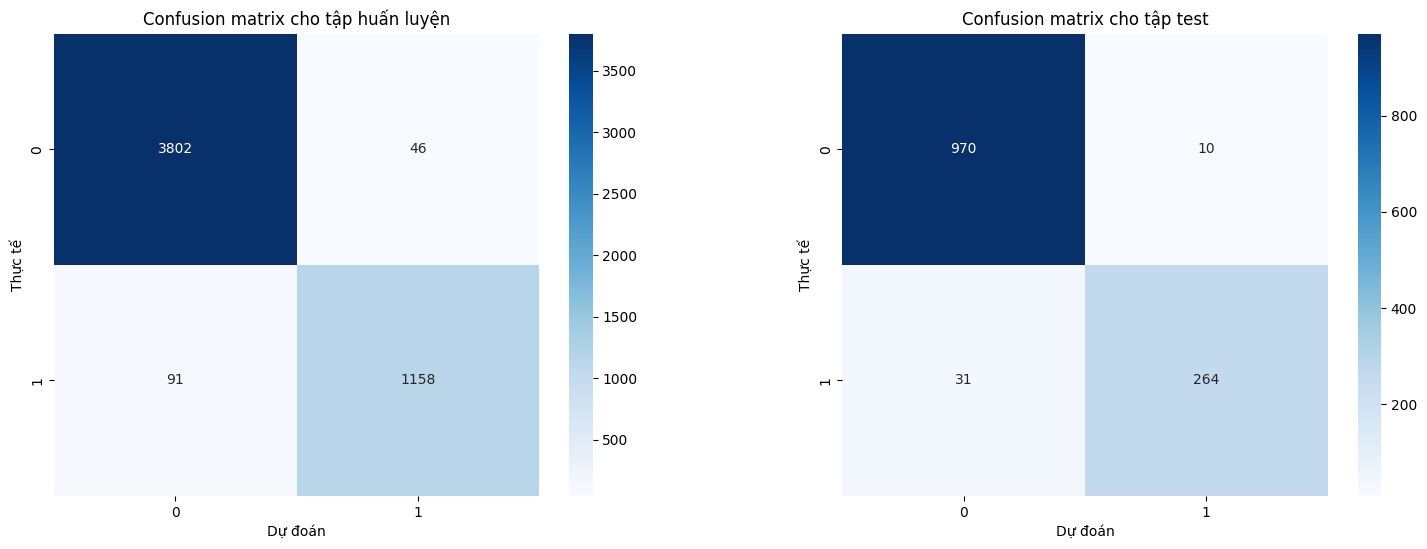

In [23]:
plot_conf_mat(y_train, y_train_pred, y_test, y_test_pred)

In [24]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3848
           1       0.96      0.93      0.94      1249

    accuracy                           0.97      5097
   macro avg       0.97      0.96      0.96      5097
weighted avg       0.97      0.97      0.97      5097



In [25]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.96      0.89      0.93       295

    accuracy                           0.97      1275
   macro avg       0.97      0.94      0.95      1275
weighted avg       0.97      0.97      0.97      1275



In [26]:
model = KNeighborsClassifier()
params = {
    'n_neighbors': np.arange(start=1, stop=300, step=2),
}

In [27]:
searchcv = GridSearchCV(estimator=model, param_grid=params, cv=4, scoring='f1')
searchcv.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([  1,   3,   5,   7,   9,  11,  13,  15,  17,  19,  21,  23,  25,
        27,  29,  31,  33,  35,  37,  39,  41,  43,  45,  47,  49,  51,
        53,  55,  57,  59,  61,  63,  65,  67,  69,  71,  73,  75,  77,
        79,  81,  83,  85,  87,  89,  91,  93,  95,  97,  99, 101, 103,
       105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127, 129,
       131, 133, 135, 137, 139, 141, 143, 145, 147, 149, 151, 153, 155,
       157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 181,
       183, 185, 187, 189, 191, 193, 195, 197, 199, 201, 203, 205, 207,
       209, 211, 213, 215, 217, 219, 221, 223, 225, 227, 229, 231, 233,
       235, 237, 239, 241, 243, 245, 247, 249, 251, 253, 255, 257, 259,
       261, 263, 265, 267, 269, 271, 273, 275, 277, 279, 281, 283, 285,
       287, 289, 291, 293, 295, 297, 299])},
             scoring='f1')

In [28]:
params_knn = searchcv.best_params_
print(params_knn)
print(searchcv.best_score_)

{'n_neighbors': 27}
0.9323314567444768


In [29]:
knn = KNeighborsClassifier(n_neighbors=params_knn['n_neighbors'])
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=27)

In [30]:
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

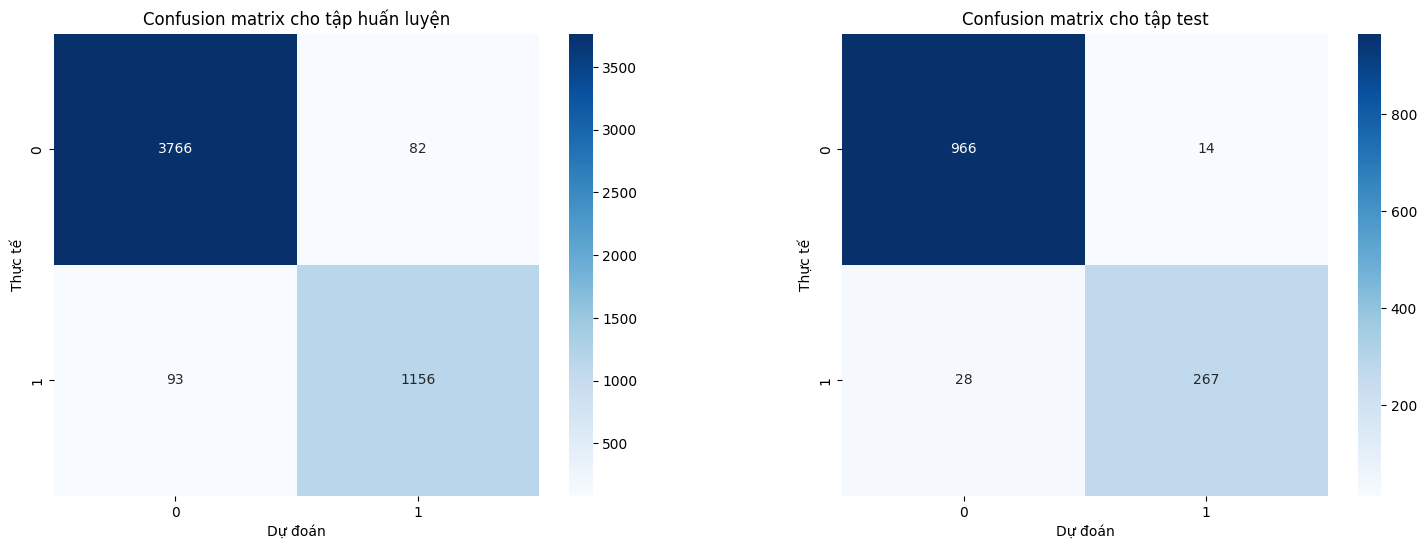

In [31]:
plot_conf_mat(y_train, y_train_pred, y_test, y_test_pred)

In [32]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3848
           1       0.93      0.93      0.93      1249

    accuracy                           0.97      5097
   macro avg       0.95      0.95      0.95      5097
weighted avg       0.97      0.97      0.97      5097



In [33]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.95      0.91      0.93       295

    accuracy                           0.97      1275
   macro avg       0.96      0.95      0.95      1275
weighted avg       0.97      0.97      0.97      1275



In [34]:
model = GradientBoostingClassifier()
params = params = {
    'n_estimators': np.arange(start=100, stop=1001, step=100),
    'learning_rate': [10**x for x in range(-6, 4)], 
    'max_depth': np.arange(start=1, stop=20, step=1),
}

In [35]:
searchcv = RandomizedSearchCV(estimator=model, param_distributions=params, cv=4, scoring='f1')
searchcv.fit(X_train, y_train)

RandomizedSearchCV(cv=4, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [1e-06, 1e-05, 0.0001,
                                                          0.001, 0.01, 0.1, 1,
                                                          10, 100, 1000],
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000])},
                   scoring='f1')

In [36]:
params_gb = searchcv.best_params_
print(params_gb)
print(searchcv.best_score_)

{'n_estimators': 600, 'max_depth': 13, 'learning_rate': 0.01}
0.9343069847668335


In [37]:
gb = GradientBoostingClassifier(n_estimators=params_gb['n_estimators'], learning_rate=params_gb['learning_rate'], max_depth=params_gb['max_depth'])
gb.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=13, n_estimators=600)

In [38]:
y_train_pred = gb.predict(X_train)
y_test_pred = gb.predict(X_test)

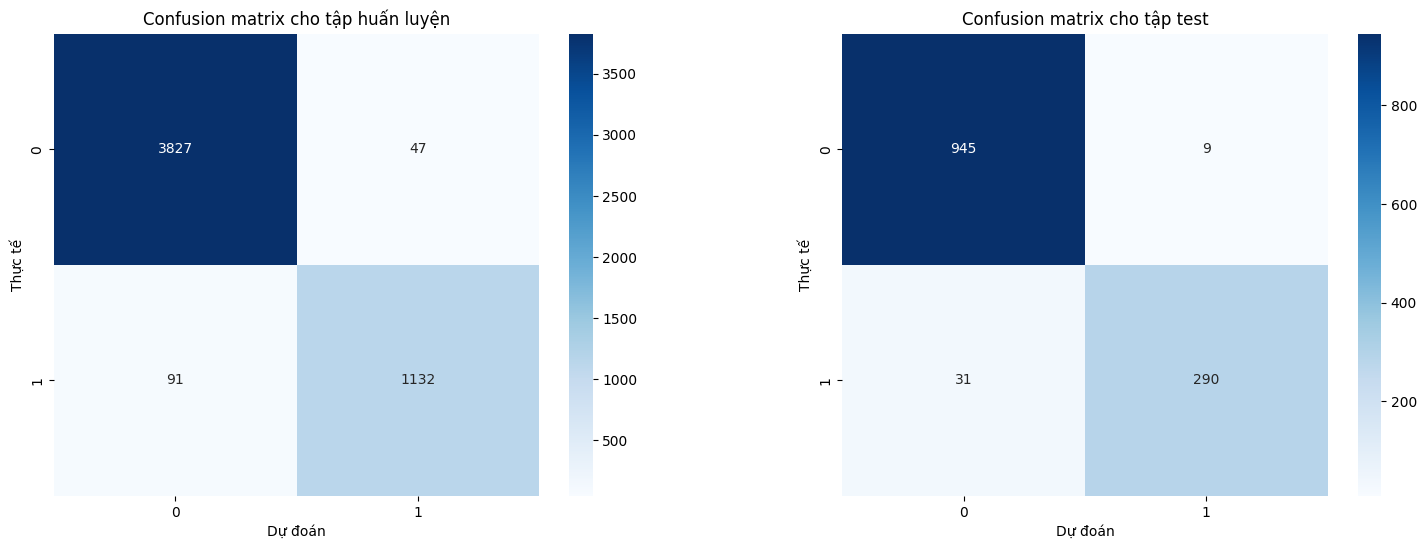

In [203]:
plot_conf_mat(y_train, y_train_pred, y_test, y_test_pred)

In [39]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3848
           1       0.96      0.93      0.94      1249

    accuracy                           0.97      5097
   macro avg       0.97      0.96      0.96      5097
weighted avg       0.97      0.97      0.97      5097



In [40]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.96      0.89      0.93       295

    accuracy                           0.97      1275
   macro avg       0.97      0.94      0.95      1275
weighted avg       0.97      0.97      0.97      1275



In [41]:
ensemble_clf = VotingClassifier(estimators=[('rf', rf), ('knn', knn), ('gb', gb)])
ensemble_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier(max_depth=9)),
                             ('knn', KNeighborsClassifier(n_neighbors=27)),
                             ('gb',
                              GradientBoostingClassifier(learning_rate=0.01,
                                                         max_depth=13,
                                                         n_estimators=600))])

In [42]:
y_train_pred = ensemble_clf.predict(X_train)
y_test_pred = ensemble_clf.predict(X_test)

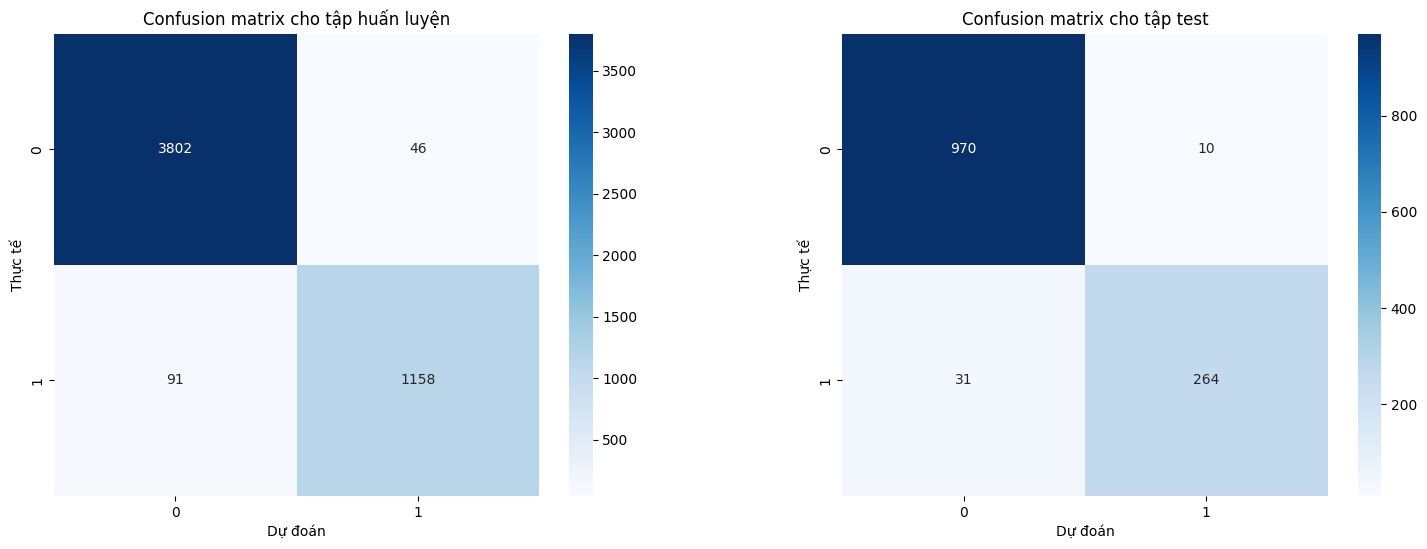

In [43]:
plot_conf_mat(y_train, y_train_pred, y_test, y_test_pred)

In [44]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3848
           1       0.96      0.93      0.94      1249

    accuracy                           0.97      5097
   macro avg       0.97      0.96      0.96      5097
weighted avg       0.97      0.97      0.97      5097



In [45]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.96      0.89      0.93       295

    accuracy                           0.97      1275
   macro avg       0.97      0.94      0.95      1275
weighted avg       0.97      0.97      0.97      1275



In [47]:
joblib.dump(ensemble_clf, 'ensemble_model.pkl')

['ensemble_model.pkl']